# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import pylab as py 

/Users/izaserpa/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes.shape

(11538, 11)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
def q1():
    height_sample = get_sample(athletes, 'height', n = 3000)
    _, p_value = sct.shapiro(height_sample)
    return bool(p_value > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

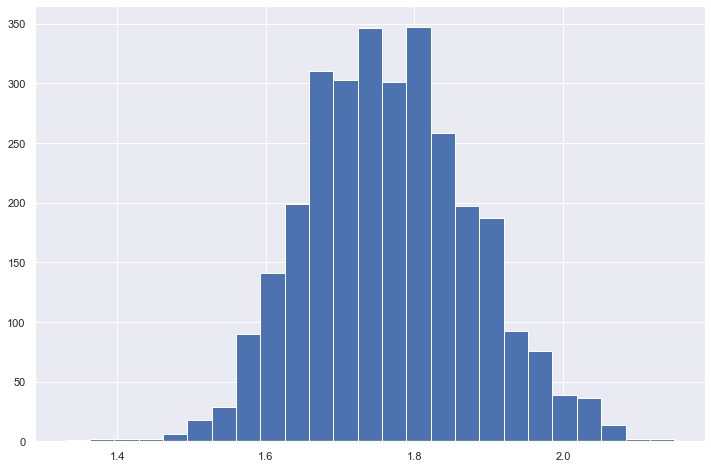

In [8]:
height_sample = get_sample(athletes, 'height', n = 3000)
height_sample.hist(bins= 25)

In [9]:
print(f'Media = {round(height_sample.mean(),4)}, Mediana = {height_sample.median()} e a Moda = {float(height_sample.mode())}')

Media = 1.7668, Mediana = 1.76 e a Moda = 1.8


Reflexão:
* Para que uma distribuição seja considerada normal, é necessário que a distribuição seja simétrica em torno da média o que implica que a média, a mediana e a moda são todas coincidentes. Neste caso, a média, mediana e moda não são coincidentes, portanto a distribuição também não é simétrica.


-----

__Para refletir__:
* Plote o qq-plot para essa variável e a analise.

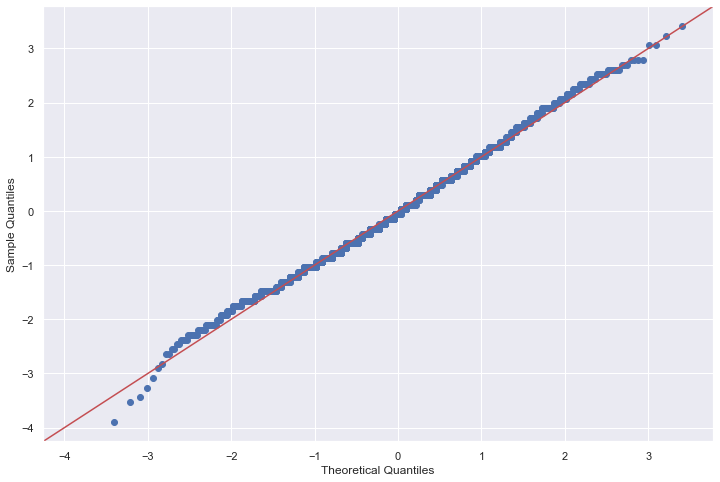

In [10]:
sm.qqplot(height_sample, fit = True, line='45')
py.show()

Reflexão:
* É possível perceber os dados seguem na maior parte dos quantis uma distribuição muito próxima a normal porém no inicio do gráfico é possivel ver que os quantis do nosso sample estão inferiores aos quantis teóricos. Isso indica que temos uma leve distorção para esquerda.
----

__Para refletir__:
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [11]:
height_sample = get_sample(athletes, 'height', n = 3000)
sct.shapiro(height_sample)[1]

5.681722541339695e-07

Reflexão: 
* Considerando que o valor de p é muito baixo (próximo a zero), entendo que não há um nível de significância razoável para conseguir outro resultado. De qualquer forma, o certo é definir um valor de nível de significância antes de realizar os testes.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [12]:
def q2():
    height_sample = get_sample(athletes, 'height', n = 3000)
    _, p_value = sct.jarque_bera(height_sample)
    return bool(p_value > 0.05)

__Para refletir__:

* Esse resultado faz sentido?

In [13]:
print(f'Skewness = {round(sct.skew(height_sample),4)}, Kurtosis = {round(sct.kurtosis(height_sample),4)}')

Skewness = 0.1597, Kurtosis = -0.0468


Reflexão:
* Esse resultado faz todo sentido, pois considerando que esse teste utiliza o skewness e o kurtosis e que uma distribuição normal tem esses dois valores próximos a zero, o resultado está conforme o esperado.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [14]:
def q3():
    weight_sample = get_sample(athletes, 'weight', n = 3000)
    _, p_value = sct.normaltest(weight_sample)
    return bool(p_value > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

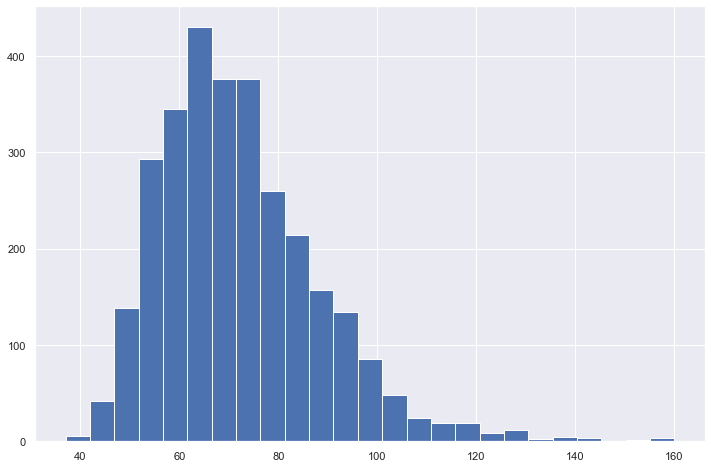

In [15]:
weight_sample = get_sample(athletes, 'weight', n = 3000)
weight_sample.hist(bins= 25)

Reflexão:
* Sim, a distribuição a variável "weight" não é simétrica e tem uma distorção para a esquerda, portanto não é uma distribuição normal.

-----

__Para refletir__:

* Um _box plot_ também poderia ajudar a entender a resposta.

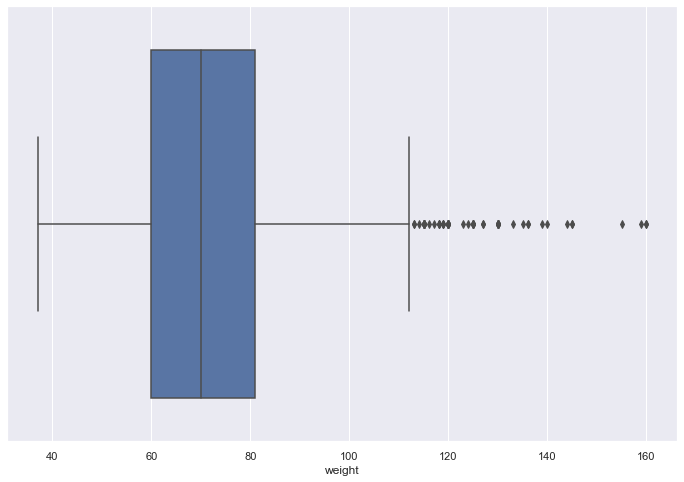

In [16]:
sns.boxplot(weight_sample)

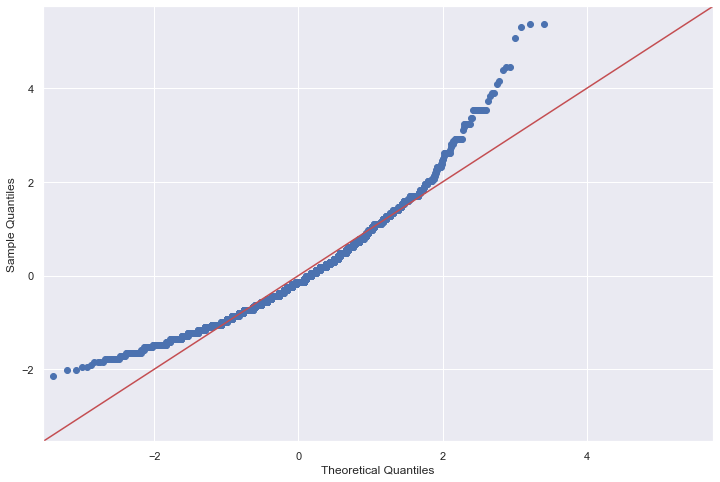

In [17]:
sm.qqplot(weight_sample, fit = True, line='45')
py.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [18]:
def q4():
    weight_sample = get_sample(athletes, 'weight', n = 3000)
    weight_logsample = np.log(weight_sample)
    _, p_value = sct.normaltest(weight_logsample)
    return bool(p_value > 0.05)
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

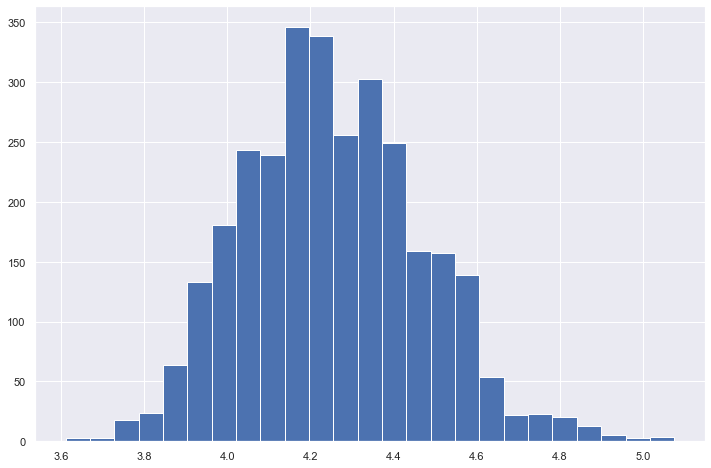

In [19]:
weight_logsample = np.log(get_sample(athletes, 'weight', n = 3000))
weight_logsample.hist(bins= 25)

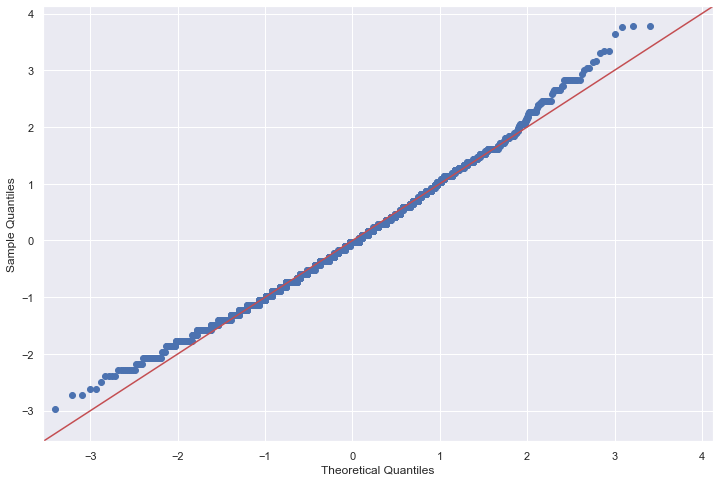

In [20]:
sm.qqplot(weight_logsample, fit = True, line='45')
py.show()

Reflexão:
* Sim, dado que ainda é possivel identificar uma pequena distorção na distribuição para a esquerda.
----

In [21]:
print(f'Media = {round(weight_logsample.mean(),4)}, Mediana = {round(weight_logsample.median(),4)} e a Moda = {float(round(weight_logsample.mode(),4))}')

Media = 4.2544, Mediana = 4.2485 e a Moda = 4.2485


In [22]:
print(f'Skewness = {round(sct.skew(weight_logsample),4)}, Kurtosis = {round(sct.kurtosis(weight_logsample),4)}')

Skewness = 0.3054, Kurtosis = 0.0899


__Para refletir__:

* Você esperava um resultado diferente agora?

Reflexão:
* Sim, no entanto talvez essa não seja a melhor transformação para essa amostra.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [23]:
def q5():
    bra = athletes[athletes['nationality'] == 'BRA']
    usa = athletes[athletes['nationality'] == 'USA']
    _, p_value = sct.ttest_ind(bra['height'], usa['height'], equal_var= False, nan_policy='omit')
    return bool(p_value > 0.005)

Testes realizados antes:

In [24]:
#Criando os dataframes separados:
bra = athletes[athletes['nationality'] == 'BRA']
usa = athletes[athletes['nationality'] == 'USA']
can = athletes[athletes['nationality'] == 'CAN']

In [25]:
#Verificando as médias dos datasets
print(usa['height'].mean())
print(bra['height'].mean())
print(can['height'].mean())

1.7877678571428557
1.764033613445379
1.7585937500000004


In [26]:
#Verificando se nos datasets temos valores nulos e a quantidade de cada tipo.
print(usa['height'].isnull().value_counts())
print(bra['height'].isnull().value_counts())
print(can['height'].isnull().value_counts())

False    560
True       7
Name: height, dtype: int64
False    476
True       9
Name: height, dtype: int64
False    320
True       1
Name: height, dtype: int64


In [27]:
#Realizando o teste de hipóteses para comparação das médias das alturas. 
#equal_var= False pois temos variancias diferentes para cada amostra
#nan_policy='omit' pois temos valores nulos nos datasets
ttest_bra_usa = sct.ttest_ind(bra['height'], usa['height'], equal_var= False, nan_policy='omit')
ttest_bra_can = sct.ttest_ind(bra['height'], can['height'], equal_var= False, nan_policy='omit')
ttest_usa_can = sct.ttest_ind(usa['height'], can['height'], equal_var= False, nan_policy='omit')
print(ttest_bra_usa)
print(ttest_bra_can)
print(ttest_usa_can)

Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)
Ttest_indResult(statistic=0.6389304914365109, pvalue=0.5230827295440921)
Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347389851)


## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [28]:
def q6():
    bra = athletes[athletes['nationality'] == 'BRA']
    can = athletes[athletes['nationality'] == 'CAN']
    _, p_value = sct.ttest_ind(bra['height'], can['height'], equal_var= False, nan_policy='omit')
    return bool(p_value > 0.005)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [32]:
def q7():
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    _, p_value = sct.ttest_ind(usa['height'], can['height'], equal_var= False, nan_policy='omit')
    return float(round(p_value,8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

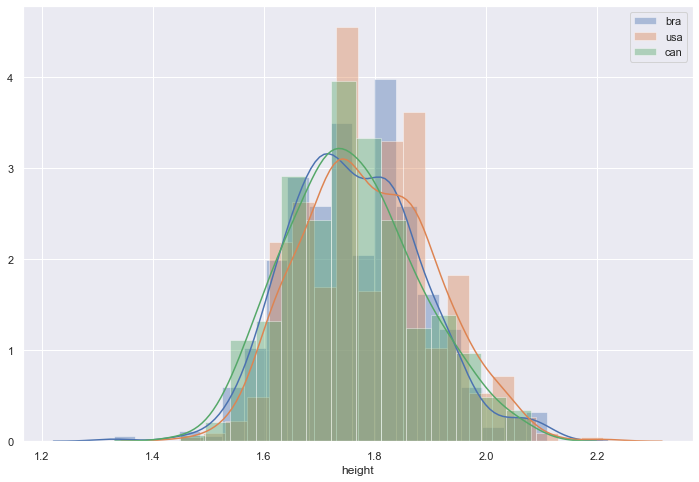

In [33]:
sns.distplot(bra['height'].dropna(), label='bra')
sns.distplot(usa['height'].dropna(), label='usa')
sns.distplot(can['height'].dropna(), label='can')
plt.legend()

Reflexão:
* Sim,é possível ver que a distribuição dos atletas do brasil são mais semelhantes a distribuição dos atletas do canadá e isso se confirma pelo p-value. 
* O p-value indica, dentro do intervalo de confiança de 95%, a probabilidade de que as médias encontradas se encontram na mesma população. 